In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\manth\Desktop\30028 manthan zala advanced ml fintech sem = 3\Train.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
# check the number of rows and columns
df.shape

(8068, 11)

In [4]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# check the null values
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
# check the duplicate values
df.duplicated().sum()

0

In [7]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
# drop the null values
df.dropna(inplace = True)

In [9]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


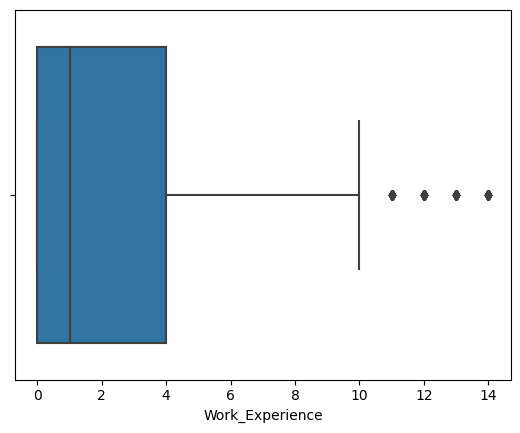

In [10]:
# check the outliers
sns.boxplot(df['Work_Experience'])
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


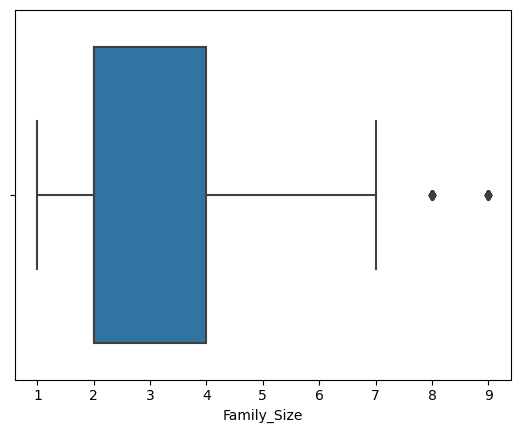

In [11]:
sns.boxplot(df['Family_Size'])
plt.show()

In [12]:
# remove outliers
q1,q3 = np.percentile(df['Work_Experience'], [25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outliers = df['Work_Experience'][(df['Work_Experience']<lower)|(df['Work_Experience']>upper)]
print(outliers)
print(min(outliers))

20      12.0
22      13.0
42      14.0
55      14.0
176     11.0
        ... 
7808    12.0
7835    13.0
7990    14.0
8028    13.0
8043    14.0
Name: Work_Experience, Length: 176, dtype: float64
11.0


In [13]:
df = df[df['Work_Experience']<=10]

In [14]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [15]:
q1,q3 = np.percentile(df['Family_Size'], [25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outliers = df['Family_Size'][(df['Family_Size']<lower)|(df['Family_Size']>upper)]
print(outliers)
print(min(outliers))

26      8.0
150     9.0
202     8.0
344     8.0
869     8.0
       ... 
7745    9.0
7799    8.0
7897    9.0
7900    9.0
7993    8.0
Name: Family_Size, Length: 75, dtype: float64
8.0


In [16]:
df = df[df['Family_Size']<=7.0]

In [17]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


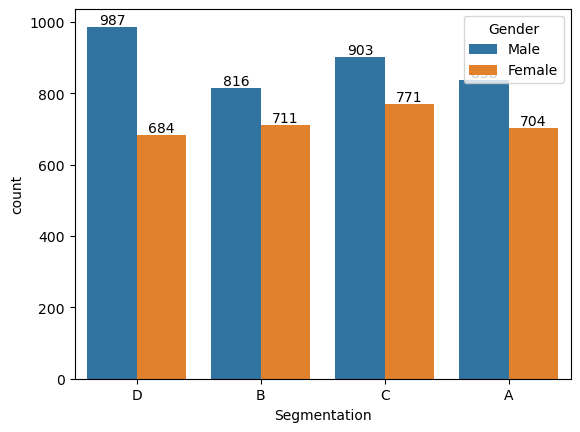

In [18]:
# data visulization
a = sns.countplot(df['Segmentation'],hue = df['Gender'])
for i in a.containers:
    a.bar_label(i,)
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


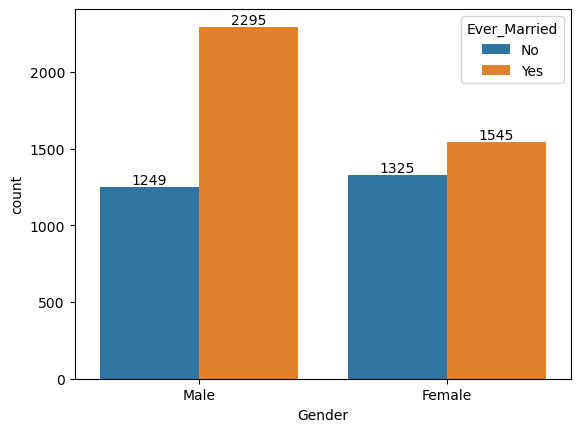

In [19]:
b = sns.countplot(df['Gender'],hue = df['Ever_Married'])
for i in b.containers:
    b.bar_label(i,)
plt.show()

In [20]:
c = df['Graduated'].value_counts()

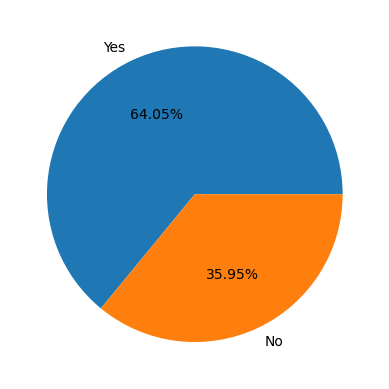

In [21]:
plt.pie(x = c.values,labels = c.index,autopct = '%.2f%%')
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


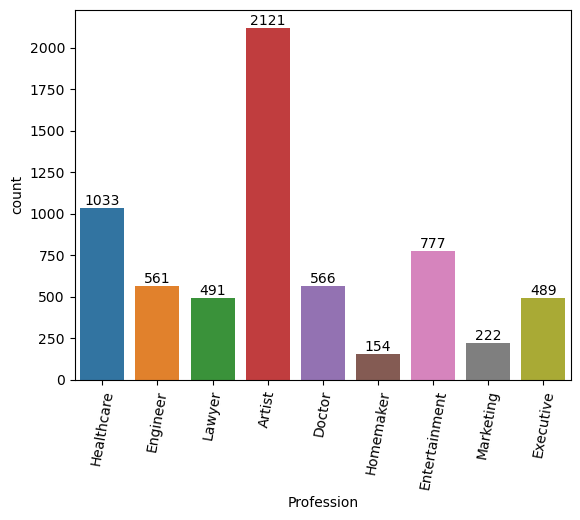

In [22]:
c = sns.countplot(df['Profession'])
plt.xticks(rotation = 80)
for i in c.containers:
    c.bar_label(i,)
plt.show()

In [23]:
d = df['Spending_Score'].value_counts()

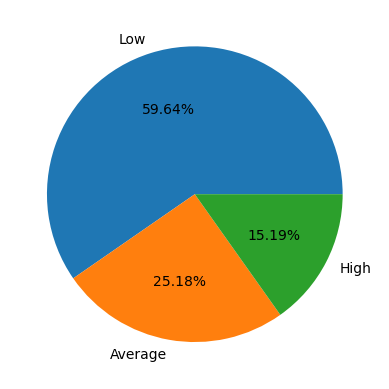

In [24]:
plt.pie(x = d.values,labels = d.index,autopct = '%.2f%%')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
la = LabelEncoder()

In [27]:
df['newSegmentation'] = la.fit_transform(df['Segmentation'])

C:\Users\manth\AppData\Local\Temp\ipykernel_22520\3054233278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newSegmentation'] = la.fit_transform(df['Segmentation'])


In [28]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,newSegmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,2
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,3
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,3
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,1


In [29]:
df.drop(['ID','Segmentation'],axis = 1,inplace = True)

C:\Users\manth\AppData\Local\Temp\ipykernel_22520\2693276399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ID','Segmentation'],axis = 1,inplace = True)


In [30]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,newSegmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,2
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,3
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,3
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,1


In [31]:
x = df.drop('newSegmentation',axis = 1)
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [32]:
y = df['newSegmentation']
y

0       3
2       1
3       1
5       2
6       2
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: newSegmentation, Length: 6414, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [35]:
ohe = OneHotEncoder()

In [36]:
column = make_column_transformer((OneHotEncoder(sparse = False),['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']),remainder='passthrough')

In [37]:
model = RandomForestClassifier(n_estimators=100)

In [38]:
pipe = make_pipeline(column,model)

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Ever_Married',
                                                   'Graduated', 'Profession',
                                                   'Spending_Score',
                                                   'Var_1'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [40]:
pipe.score(x_test,y_test)

0.5011691348402182